In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
image = np.arange(1, 50).reshape((7, 7))
image

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19, 20, 21],
       [22, 23, 24, 25, 26, 27, 28],
       [29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42],
       [43, 44, 45, 46, 47, 48, 49]])

In [6]:
filter_kernel = np.array([[-1, 1, -1], [-2., 3, 1], [2, -4, 0]])
filter_kernel

array([[-1.,  1., -1.],
       [-2.,  3.,  1.],
       [ 2., -4.,  0.]])

In [8]:
I = scipy.signal.convolve2d(image, filter_kernel, mode='same')
I

array([[ -2.,  -8.,  -7.,  -6.,  -5.,  -4.,  28.],
       [  5.,  -3.,  -4.,  -5.,  -6.,  -7.,  28.],
       [ -2., -10., -11., -12., -13., -14.,  28.],
       [ -9., -17., -18., -19., -20., -21.,  28.],
       [-16., -24., -25., -26., -27., -28.,  28.],
       [-23., -31., -32., -33., -34., -35.,  28.],
       [-29.,  13.,  13.,  13.,  13.,  13.,  27.]])

In [9]:
def zero_pad(x, pad=1, fill_value=0):
    m, n = x.shape
    result = np.full(shape=(m + 2*pad, n+2*pad), fill_value=fill_value)
    result[pad:-pad, pad:-pad] = x
    return result

In [14]:
pad_im = zero_pad(image)

In [11]:
filter_kernel[::-1, ::-1]

array([[ 0., -4.,  2.],
       [ 1.,  3., -2.],
       [-1.,  1., -1.]])

In [13]:
flip_filter = np.rot90(filter_kernel, 2)

In [15]:
row, col = image.shape
h, w = flip_filter.shape
im_out = np.zeros(shape=(row, col))
for r in range(row):
    for c in range(col):
        r_start = r
        r_end = r_start + h
        c_start = c
        c_end = c_start + w
        im_out[r, c] = np.sum(np.multiply(flip_filter, pad_im[r_start:r_end, c_start:c_end]))

In [16]:
im_out

array([[ -2.,  -8.,  -7.,  -6.,  -5.,  -4.,  28.],
       [  5.,  -3.,  -4.,  -5.,  -6.,  -7.,  28.],
       [ -2., -10., -11., -12., -13., -14.,  28.],
       [ -9., -17., -18., -19., -20., -21.,  28.],
       [-16., -24., -25., -26., -27., -28.,  28.],
       [-23., -31., -32., -33., -34., -35.,  28.],
       [-29.,  13.,  13.,  13.,  13.,  13.,  27.]])

In [17]:
import cv2

In [21]:
img = cv2.imread('monalisa.png')

In [23]:
img.shape

(1052, 697, 3)

In [24]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1052, 697)

### Mean Filter

In [37]:
n_row, n_col = gray.shape

# gaussian filter
gauss = np.random.normal(loc=0, scale=10, size=(n_row, n_col))
gray_noisy = gray + gauss
# scipy convol2d
Hm = np.ones(shape=(3, 3)) / 9.0
Gm = scipy.signal.convolve2d(gray_noisy, Hm, mode='same')

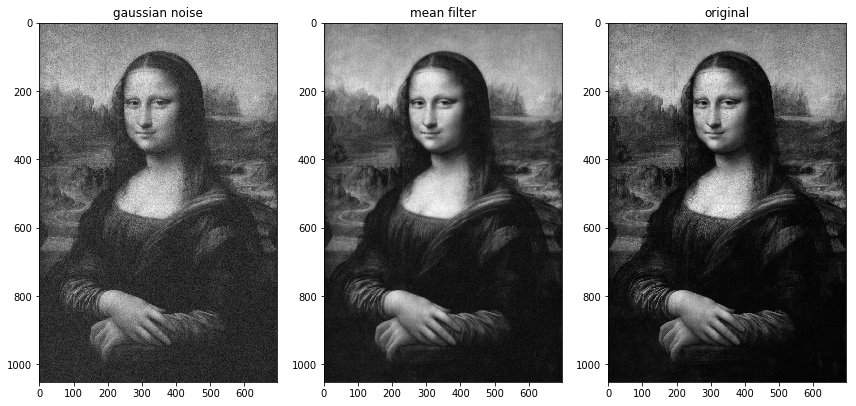

In [40]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 6))

ax0.imshow(gray_noisy, cmap=plt.cm.gray)
ax0.set_title('gaussian noise')

ax1.imshow(Gm, cmap=plt.cm.gray)
ax1.set_title('mean filter')

ax2.imshow(gray, cmap=plt.cm.gray)
ax2.set_title('original')

fig.tight_layout()

### Median Filter

In [44]:
rand_noise = np.random.randint(low=0, high=21, size=(n_row, n_col))
gray_salt_pepper = np.where(rand_noise==0, 0, gray)
gray_salt_pepper = np.where(rand_noise==20, 255, gray_salt_pepper)

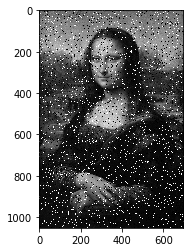

In [45]:
plt.imshow(gray_salt_pepper, cmap=plt.cm.gray)

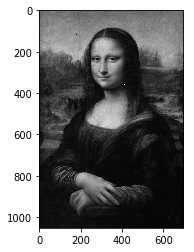

In [46]:
## use opencv medianBlur
gray_sp_removed = cv2.medianBlur(gray_salt_pepper, 3)
plt.imshow(gray_sp_removed, cmap=plt.cm.gray)

In [50]:
median_filter = np.ones(shape=(3, 3))
median_remove = np.zeros_like(gray_salt_pepper)
n_row, r_col = median_remove.shape
gray_salt_pepper_padd = np.pad(gray_salt_pepper, pad_width=1, mode='constant', constant_values=0)

for i in range(n_row):
    for j in range(n_col):
        r_start = i*1
        r_end = r_start + 3
        c_start = j*1
        c_end = c_start + 3
        val = np.median(np.multiply(median_filter, gray_salt_pepper_padd[r_start:r_end, c_start:c_end]))
        median_remove[i, j] = val

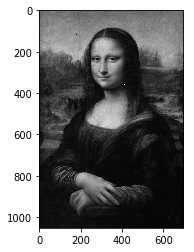

In [51]:
plt.imshow(median_remove, cmap=plt.cm.gray)

### Gaussian Filter

In [52]:
h, w = 20, 20
xs = np.arange(h) - h//2
ys = np.arange(w) - w//2


In [56]:
XX, YY = np.meshgrid(xs, ys)

In [112]:
def gauss(x, y, gamma=10):
    return np.exp(-(x**2 + y**2)/gamma)

In [113]:
Hg = gauss(XX.ravel(), YY.ravel()).reshape((h, w))
Hg2 = gauss(XX.ravel(), YY.ravel(), gamma=20).reshape((h, w))

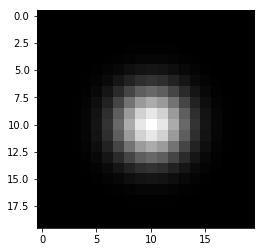

In [114]:
plt.imshow(Hg, cmap=plt.cm.gray)

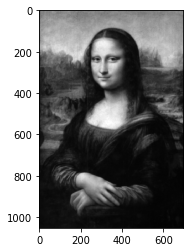

In [115]:
gray_blur = scipy.signal.convolve2d(gray, Hg, mode='same')
plt.imshow(gray_blur, cmap=plt.cm.gray)

In [116]:
gray_high = gray - gray_blur

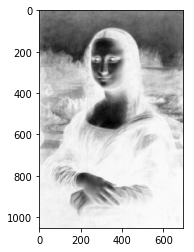

In [117]:
plt.imshow(gray_high, cmap=plt.cm.gray)

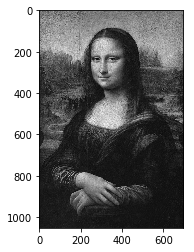

In [121]:
gray_sharp = gray + 0.01*gray_high
plt.imshow(gray_sharp, cmap=plt.cm.gray)

### Gradient-based Filters

In [131]:
horizon_filter = np.array([[1, 0, -1], 
                           [1., 0, -1], 
                           [1, 0, -1]])

vertical_filter = np.array([[1, 1, 1], 
                            [0, 0, 0], 
                            [-1, -1, -1.]])

In [132]:
hori_gray = scipy.signal.convolve2d(gray, horizon_filter, mode='same')
verti_gray = scipy.signal.convolve2d(gray, vertical_filter, mode='same')

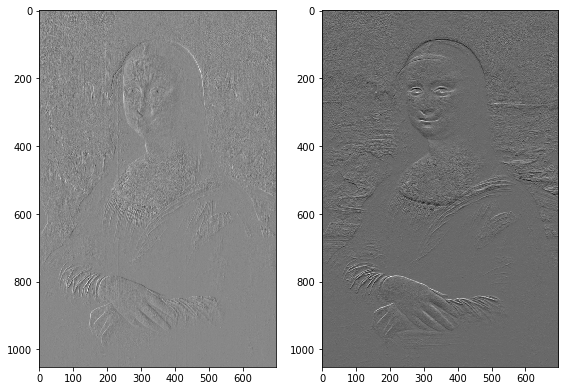

In [133]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 6))
ax[0].imshow(hori_gray, cmap=plt.cm.gray)
ax[1].imshow(verti_gray, cmap=plt.cm.gray)

fig.tight_layout()

### Sobel Edge-Detection Filter

In [137]:
Hx = np.outer([1, 2, 1], [1, 0, -1])
Hy = np.outer([-1, 0, 1], [1, 2, 1])

In [138]:
Gx = scipy.signal.convolve2d(gray, Hx, mode='same')
Gy = scipy.signal.convolve2d(gray, Hy, mode='same')

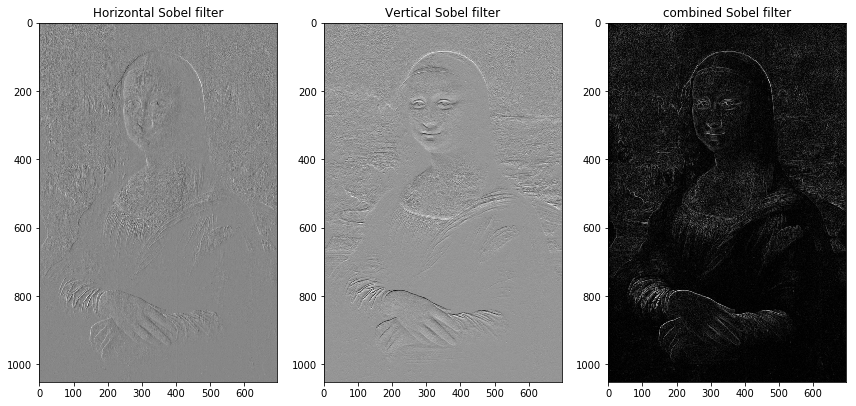

In [143]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 6))

ax[0].imshow(Gx, cmap=plt.cm.gray)
ax[0].set_title('Horizontal Sobel filter')
ax[1].imshow(Gy, cmap=plt.cm.gray)
ax[1].set_title('Vertical Sobel filter')
ax[2].imshow(np.sqrt(Gx**2 + Gy**2), cmap=plt.cm.gray)
ax[2].set_title('combined Sobel filter')

fig.tight_layout()

### Convolution Neural Networks

In [144]:
import tensorflow as tf

### Convolutional Neural Network for Digit Recognition on the MNIST Dataset

In [31]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [35]:
# Convolution Layer
def conv2d(X, w, b, strides=1):
    '''relu(X*w + b)'''
    x = tf.nn.conv2d(X, w, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

# Pooling Layer
def maxpool2d(X, stride=2):
    return tf.nn.max_pool(X, ksize=[1, stride, stride, 1], 
                          strides=[1, stride, stride, 1], padding='SAME')

# feed forward
def conv_net(X, weights, biases, dropout):
    
    # reshape x to [m_samples, height, width, channel]
    #X = tf.reshape(X, shape=[-1, 28, 28, 1])
    
    # conv_1
    conv1 = conv2d(X, weights['wc1'], biases['bc1'], strides=1)
    conv1 = maxpool2d(conv1, stride=2)
    
    # conv_2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], strides=1)
    conv2 = maxpool2d(conv2, stride=2)
    
    # fully 1
    conv2 = tf.reshape(conv2, shape=[-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(conv2, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.dropout(fc1, dropout)
    # output
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [ ]:
tf.reset_default_graph()

# init parameters
learning_rate = 0.01
epochs = 20
batch_size= 16
n_batches = mnist.train.num_examples // batch_size
input_height = 28
input_width = 28
n_classes = 10
dropout = 0.75

filter_height = 5
filter_width = 5
channel_in = 1
channel_1 = 64
channel_2 = 128
hidden_1 = 1024

display_step = 1

out_flatten = (input_height//4) * (input_width//4) * channel_2

# init variables
X = tf.placeholder(dtype=tf.float32, shape=[None, input_height, input_width, 1])
Y = tf.placeholder(dtype=tf.float32, shape=[None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# 2 * conv-relu-maxpool -> 2 * fully connected
weights = {
    'wc1': tf.Variable(tf.random_normal(shape=[filter_height, filter_width, channel_in, channel_1])),
    'wc2': tf.Variable(tf.random_normal(shape=[filter_height, filter_width, channel_1, channel_2])),
    'wd1': tf.Variable(tf.random_normal(shape=[out_flatten, hidden_1])),
    'out': tf.Variable(tf.random_normal(shape=[hidden_1, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.zeros([channel_1])),
    'bc2': tf.Variable(tf.zeros([channel_2])),
    'bd1': tf.Variable(tf.zeros([hidden_1])),
    'out': tf.Variable(tf.zeros([n_classes]))
}

# output 
pred = conv_net(X, weights, biases, keep_prob)

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# eval metrics
correct_pred = tf.equal(tf.argmax(Y, axis=1), tf.argmax(pred, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

# training model
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        for j in range(n_batches):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={X:batch_x, Y:batch_y, keep_prob:dropout})
        if (epochs % display_step == 0):
            loss, acc = sess.run([cost, accuracy], feed_dict={X:batch_x, Y:batch_y, keep_prob:1.})
            print("Epoch {}: cost: {:.4f} accuracy: {:.4f}".format(i+1, loss, acc))
    print("Training Completed\n-----------------")
    
    test_pred = sess.run(pred, feed_dict={X:mnist.test.images[:256], keep_prob:1.})
    acc = sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.})
    print("Test accuracy: {:.4f}".format(acc))
    
    incorrect_mask = np.equal(np.argmax(test_pred, axis=1), np.argmax(mnist.test.labels[:256], axis=1))
    samples = mnist.test.images[:256][incorrect_mask][:10]
    preds = np.argmax(test_pred)[incorrect_mask][:10]
    fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 8))
    for axi, img, y_hat in zip(ax.flat, samples, preds):
        axi.imshow(img.reshape(28, 28), cmap=plt.cm.gray)
        axi.set_title("pred {}".format(y_hat))
        
    fig.tight_layout()
    